In [ ]:
library(tidyverse)
mushroom <- read_csv("/agaricus-lepiota.data", col_names = FALSE)
glimpse(mushroom)


Rows: 8124 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (22): X1, X2, X3, X4, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16,...
lgl  (1): X5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 8,124
Columns: 23
$ X1  <chr> "p", "e", "e", "p", "e", "e", "e", "e", "p", "e", "e", "e", "e", "…
$ X2  <chr> "x", "x", "b", "x", "x", "x", "b", "b", "x", "b", "x", "x", "b", "…
$ X3  <chr> "s", "s", "s", "y", "s", "y", "s", "y", "y", "s", "y", "y", "s", "…
$ X4  <chr> "n", "y", "w", "w", "g", "y", "w", "w", "w", "y", "y", "y", "y", "…
$ X5  <lgl> TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, TRUE, TRUE,…
$ X6  <chr> "p", "a", "l", "p", "n", "a", "a", "l", "p", "a", "l", "a", "a", "…
$ X7  <chr> "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "f", "…
$ X8  <chr> "c", "c", "c", "c", "w", "c", "c", "c", "c", "c", "c", "c", "c", "…
$ X9  <chr> "n", "b", "b", "n", "b", "b", "b", "b", "n", "b", "b", "b", "b", "…
$ X10 <chr> "k", "k", "n", "n", "k", "n", "g", "n", "p", "g", "g", "n", "w", "…
$ X11 <chr> "e", "e", "e", "e", "t", "e", "e", "e", "e", "e", "e", "e", "e", "…
$ X12 <chr> "e", "c", "c", "e", "e", "c", "c", "c", "e", "c", "c", "c", "c", "…
$ X13 <chr> "s",

## Changing variable names for more  INTERPRETABILITY

In [ ]:
colnames(mushroom) <- c("edibility", "cap_shape", "cap_surface",
                        "cap_color", "bruises", "odor",
                        "gill_attachement", "gill_spacing", "gill_size",
                        "gill_color", "stalk_shape", "stalk_root",
                        "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_color_above_ring",
                        "stalk_color_below_ring", "veil_type", "veil_color",
                        "ring_number", "ring_type", "spore_print_color",
                        "population", "habitat")

# Defining the levels for the categorical variables
## We make each variable as a factor
mushroom <- mushroom %>% map_df(function(.x) as.factor(.x))

## We redefine each of the category for each of the variables
levels(mushroom$edibility) <- c("edible", "poisonous")
levels(mushroom$cap_shape) <- c("bell", "conical", "flat", "knobbed", "sunken", "convex")
levels(mushroom$cap_color) <- c("buff", "cinnamon", "red", "gray", "brown", "pink",
                                "green", "purple", "white", "yellow")
levels(mushroom$cap_surface) <- c("fibrous", "grooves", "scaly", "smooth")
levels(mushroom$bruises) <- c("no", "yes")
levels(mushroom$odor) <- c("almond", "creosote", "foul", "anise", "musty", "none", "pungent", "spicy", "fishy")
levels(mushroom$gill_attachement) <- c("attached", "free")
levels(mushroom$gill_spacing) <- c("close", "crowded")
levels(mushroom$gill_size) <- c("broad", "narrow")
levels(mushroom$gill_color) <- c("buff", "red", "gray", "chocolate", "black", "brown", "orange",
                                 "pink", "green", "purple", "white", "yellow")
levels(mushroom$stalk_shape) <- c("enlarging", "tapering")
levels(mushroom$stalk_root) <- c("missing", "bulbous", "club", "equal", "rooted")
levels(mushroom$stalk_surface_above_ring) <- c("fibrous", "silky", "smooth", "scaly")
levels(mushroom$stalk_surface_below_ring) <- c("fibrous", "silky", "smooth", "scaly")
levels(mushroom$stalk_color_above_ring) <- c("buff", "cinnamon", "red", "gray", "brown", "pink",
                                "green", "purple", "white", "yellow")
levels(mushroom$stalk_color_below_ring) <- c("buff", "cinnamon", "red", "gray", "brown", "pink",
                                "green", "purple", "white", "yellow")
levels(mushroom$veil_type) <- "partial"
levels(mushroom$veil_color) <- c("brown", "orange", "white", "yellow")
levels(mushroom$ring_number) <- c("none", "one", "two")
levels(mushroom$ring_type) <- c("evanescent", "flaring", "large", "none", "pendant")
levels(mushroom$spore_print_color) <- c("buff", "chocolate", "black", "brown", "orange",
                                        "green", "purple", "white", "yellow")
levels(mushroom$population) <- c("abundant", "clustered", "numerous", "scattered", "several", "solitary")
levels(mushroom$habitat) <- c("wood", "grasses", "leaves", "meadows", "paths", "urban", "waste")

In [ ]:
glimpse(mushroom)

Rows: 8,124
Columns: 23
$ edibility                <fct> poisonous, edible, edible, poisonous, edible,…
$ cap_shape                <fct> convex, convex, bell, convex, convex, convex,…
$ cap_surface              <fct> scaly, scaly, scaly, smooth, scaly, smooth, s…
$ cap_color                <fct> brown, yellow, white, white, gray, yellow, wh…
$ bruises                  <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, y…
$ odor                     <fct> pungent, almond, anise, pungent, none, almond…
$ gill_attachement         <fct> free, free, free, free, free, free, free, fre…
$ gill_spacing             <fct> close, close, close, close, crowded, close, c…
$ gill_size                <fct> narrow, broad, broad, narrow, broad, broad, b…
$ gill_color               <fct> black, black, brown, brown, black, brown, gra…
$ stalk_shape              <fct> enlarging, enlarging, enlarging, enlarging, t…
$ stalk_root               <fct> equal, club, club, equal, equal, club, club, …
$ stalk_surface_

# Understanding the levels of uniqueness

In [ ]:
number_class <- function(x){
  x <- length(levels(x))
}

x <- mushroom %>% map_dbl(function(.x) number_class(.x)) %>% as_tibble() %>%
       rownames_to_column() %>% arrange(desc(value))
colnames(x) <- c("Variable name", "Number of levels")
print(x)

# A tibble: 23 × 2
   `Variable name` `Number of levels`
   <chr>                        <dbl>
 1 10                              12
 2 4                               10
 3 15                              10
 4 16                              10
 5 6                                9
 6 21                               9
 7 23                               7
 8 2                                6
 9 22                               6
10 12                               5
# ℹ 13 more rows


In [ ]:
mushroom <- mushroom %>% select(- veil_type)

In [ ]:
map_dbl(mushroom, function(.x) {sum(is.na(.x))})

edibility                cap_shape              cap_surface 
                       0                        0                        0 
               cap_color                  bruises                     odor 
                       0                        0                        0 
        gill_attachement             gill_spacing                gill_size 
                       0                        0                        0 
              gill_color              stalk_shape               stalk_root 
                       0                        0                        0 
stalk_surface_above_ring stalk_surface_below_ring   stalk_color_above_ring 
                       0                        0                        0 
  stalk_color_below_ring               veil_color              ring_number 
                       0                        0                        0 
               ring_type        spore_print_color               population 
                       0                        0                        0 
                 habitat 
                       0

# Plotting to understand the collinearity and distribution of data

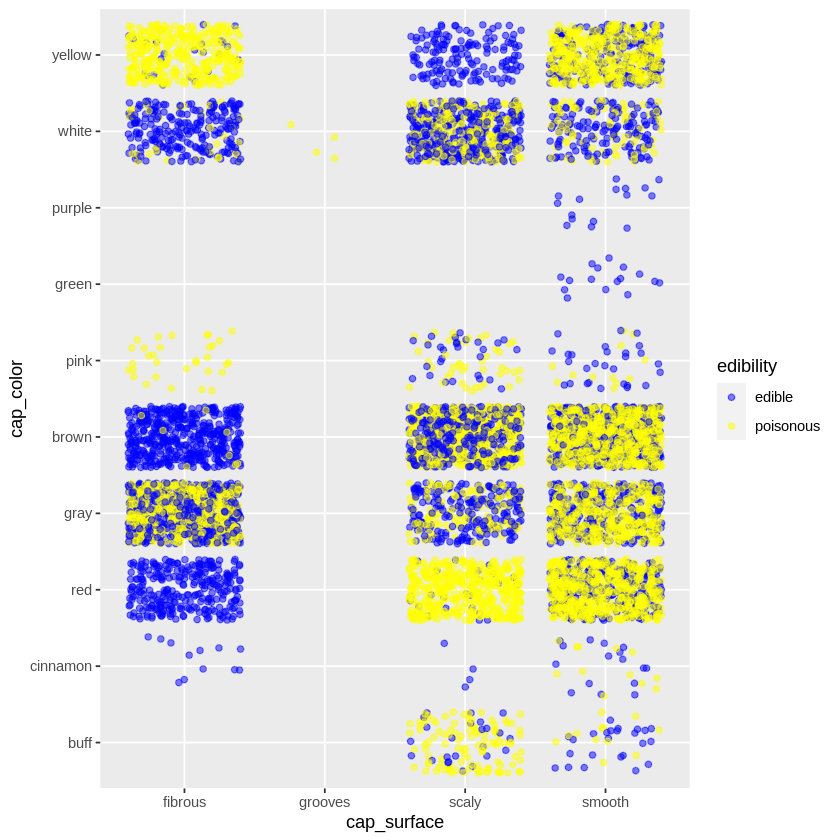

In [ ]:
library(ggplot2)
ggplot(mushroom, aes(x = cap_surface, y = cap_color, col = edibility)) +
  geom_jitter(alpha = 0.5) +
  scale_color_manual(breaks = c("edible", "poisonous"),
                     values = c("blue", "yellow"))

* The fibrous mushrooms are generally yellow or brown in their cap color but brown is the safer bet to consume based on cap color.
* Fibrous ones with red cap color are edible but stay away from scaly mushrooms which have red cap color.







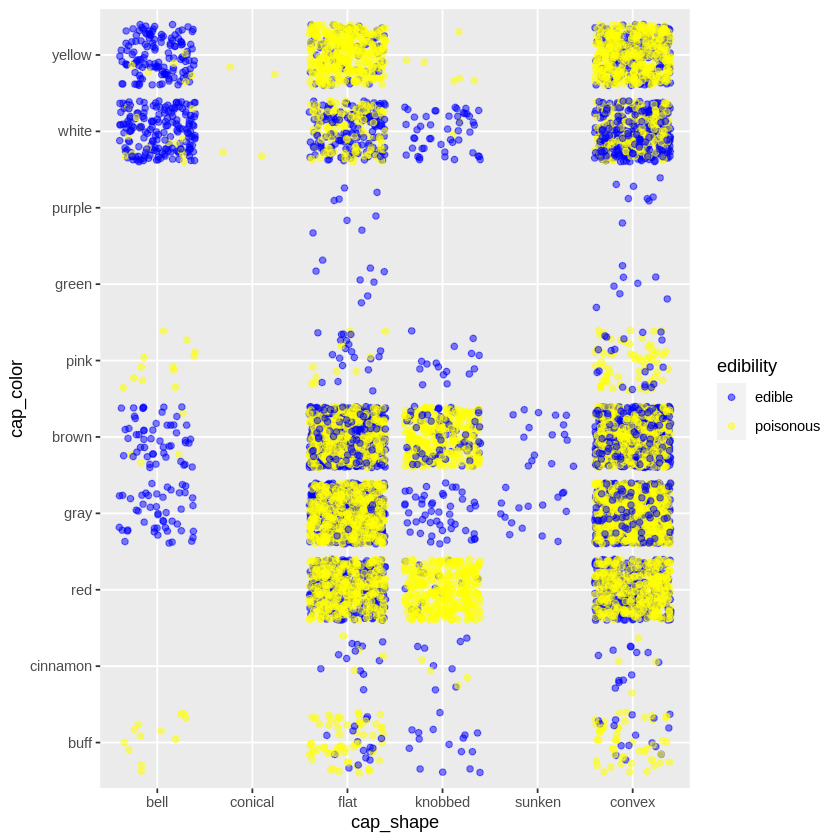

In [ ]:
ggplot(mushroom, aes(x = cap_shape, y = cap_color, col = edibility)) +
  geom_jitter(alpha = 0.5) +
  scale_color_manual(breaks = c("edible", "poisonous"),
                     values = c("blue", "yellow"))

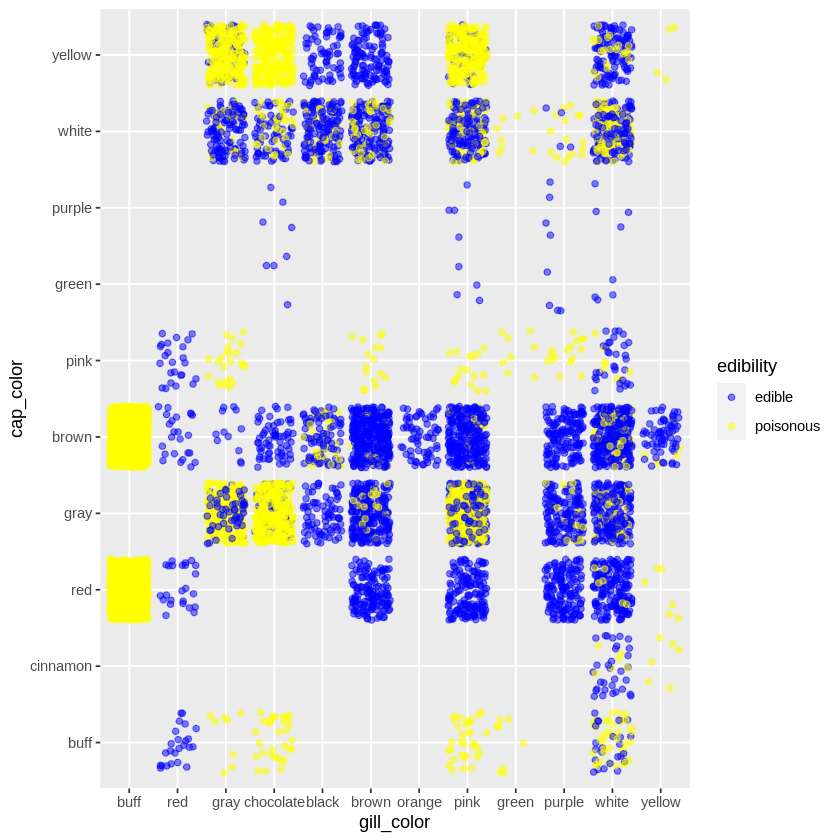

In [ ]:
ggplot(mushroom, aes(x = gill_color, y = cap_color, col = edibility)) +
  geom_jitter(alpha = 0.5) +
  scale_color_manual(breaks = c("edible", "poisonous"),
                     values = c("blue", "yellow"))

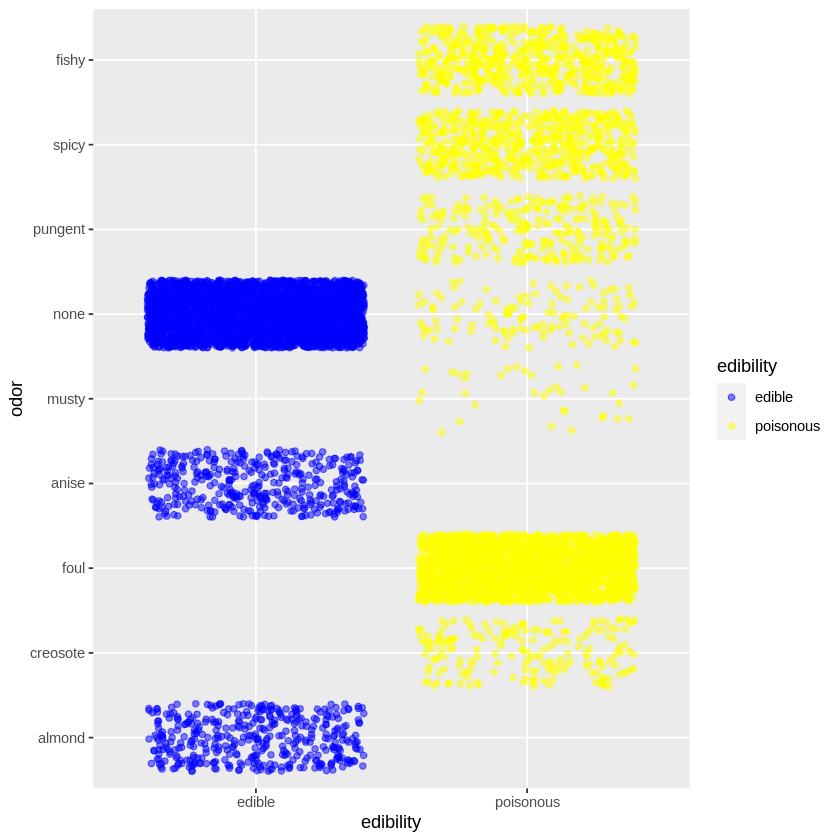

In [ ]:
ggplot(mushroom, aes(x = edibility, y = odor, col = edibility)) +
  geom_jitter(alpha = 0.5) +
  scale_color_manual(breaks = c("edible", "poisonous"),
                     values = c("blue", "yellow"))

* Basically, avoid anything that has a strong or fishy smell.
* Consumption is plausible if it has an almond or anise scent.
* The likelihood that something is edible is higher if it smells bad.

In [ ]:
set.seed(1810)
mushsample <- caret::createDataPartition(y = mushroom$edibility, times = 1, p = 0.8, list = FALSE)
train_mushroom <- mushroom[mushsample, ]
test_mushroom <- mushroom[-mushsample, ]

In [ ]:
round(prop.table(table(mushroom$edibility)), 2)


   edible poisonous 
     0.52      0.48 

In [ ]:
round(prop.table(table(train_mushroom$edibility)), 2)


   edible poisonous 
     0.52      0.48 

In [ ]:
round(prop.table(table(test_mushroom$edibility)), 2)


   edible poisonous 
     0.52      0.48 

# Plotting error curves to understand model performance

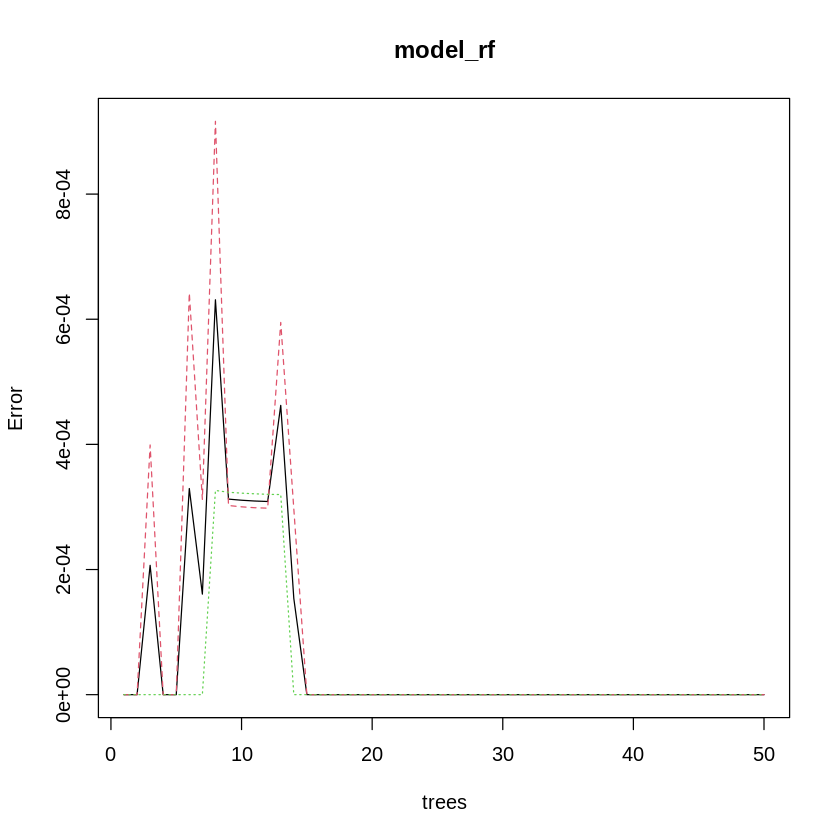

In [ ]:
library(randomForest)
model_rf <- randomForest(edibility ~ ., ntree = 50, data = train_mushroom)
plot(model_rf)

In [ ]:
print(model_rf)


Call:
 randomForest(formula = edibility ~ ., data = train_mushroom,      ntree = 50) 
               Type of random forest: classification
                     Number of trees: 50
No. of variables tried at each split: 4

        OOB estimate of  error rate: 0%
Confusion matrix:
          edible poisonous class.error
edible      3367         0           0
poisonous      0      3133           0


# Confusion Matrix

In [ ]:
caret::confusionMatrix(data = model_rf$predicted, reference = train_mushroom$edibility ,
                       positive = "edible")

Confusion Matrix and Statistics

           Reference
Prediction  edible poisonous
  edible      3367         0
  poisonous      0      3133
                                     
               Accuracy : 1          
                 95% CI : (0.9994, 1)
    No Information Rate : 0.518      
    P-Value [Acc > NIR] : < 2.2e-16  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.000      
            Specificity : 1.000      
         Pos Pred Value : 1.000      
         Neg Pred Value : 1.000      
             Prevalence : 0.518      
         Detection Rate : 0.518      
   Detection Prevalence : 0.518      
      Balanced Accuracy : 1.000      
                                     
       'Positive' Class : edible     
                                     

#Variables with highest weightage

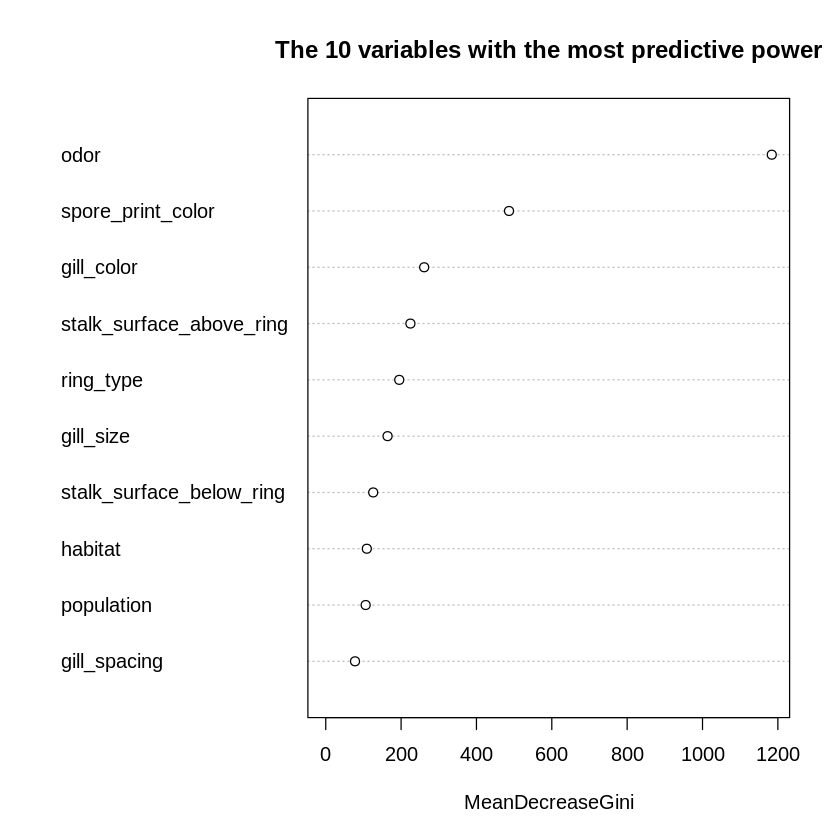

In [ ]:
varImpPlot(model_rf, sort = TRUE,
           n.var = 10, main = "The 10 variables with the most predictive power")

In [ ]:
library(tibble)
importance(model_rf) %>% data.frame() %>%
  rownames_to_column(var = "Variable") %>%
  arrange(desc(MeanDecreaseGini)) %>%
  head(10)

,Variable,MeanDecreaseGini
,<chr>,<dbl>
1,odor,1183.80532
2,spore_print_color,486.40639
3,gill_color,261.25848
4,stalk_surface_above_ring,224.76250
5,ring_type,195.08393
6,gill_size,164.09039
7,stalk_surface_below_ring,125.96380
8,habitat,109.01568
9,population,105.94912


#Predictions

In [ ]:
test_rf <- predict(model_rf, newdata = test_mushroom)

# Quick check on our prediction
table(test_rf, test_mushroom$edibility)

           
test_rf     edible poisonous
  edible       841         0
  poisonous      0       783